El código determinara si la calidad de un teléfono es mala, media o buena.

1.   Elemento de la lista

1.   Elemento de la lista
2.   Elemento de la lista


2.   Elemento de la lista



---


ENTRADAS: 


Precio:

    Caro
    Medio
    Barato

  Piezas:

    Bueno
    Medio
    Malo

SALIDA

  Calidad:

    Alta
    Media
    Baja

REGLAS:

 Si el precio es alto y las piezas son buenas, la calidad del teléfono es alta.

 si el precio es medio y las piezas son media, la calidad del teléfono es media.

 si el precio es bajo y las piezas son malas, la calidad del teléfono es malo.

In [1]:
!pip install networkx==2.3
!pip install scikit-fuzzy


Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     |████████████████████████████████| 1.7 MB 5.3 MB/s 
  Created wheel for networkx: filename=networkx-2.3-py2.py3-none-any.whl size=1556008 sha256=a94565fd54618f72b318297f0caf117e42daddf8c64cea11b26c8aad2b596a0f
  Stored in directory: /root/.cache/pip/wheels/44/e6/b8/4efaab31158e9e9ca9ed80b11f6b11130bac9a9672b3cbbeaf
Successfully built networkx
  Attempting uninstall: networkx
    Found existing installation: networkx 2.6.3
    Uninstalling networkx-2.6.3:
      Successfully uninstalled networkx-2.6.3
ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. This behaviour is the source of the following dependency conflicts.
albumentations 0.1.12 requires imgaug<0.2.7,>=0.2.5, but you have imgaug 0.2.9 which is incompatible.
Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     |█████████

In [2]:
import numpy as np
import skfuzzy as fuzz
from skfuzzy import control as ctrl


precio = ctrl.Antecedent(np.arange(0, 11, 1), 'precio')
piezas = ctrl.Antecedent(np.arange(0, 11, 1), 'piezas')
calidad = ctrl.Consequent(np.arange(0, 11, 1), 'calidad')


piezas.automf(names=['malo', 'medio', 'bueno'])
precio.automf(names=['bajo', 'medio', 'alto'])

calidad['mala'] = fuzz.trimf(calidad.universe, [0, 0, 5])
calidad['media'] = fuzz.trimf(calidad.universe, [0, 5, 10])
calidad['alta'] = fuzz.trimf(calidad.universe, [5, 10, 10])

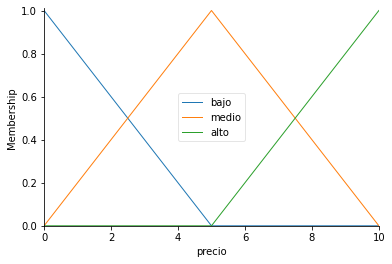

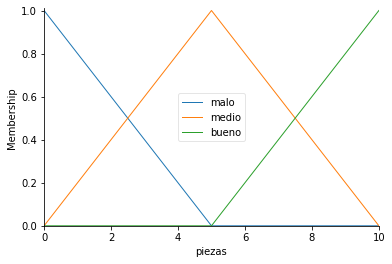

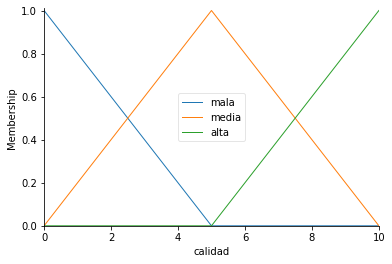

In [3]:
precio.view()
piezas.view()
calidad.view()

In [4]:
R1 = ctrl.Rule(precio['alto'] & piezas['bueno'], calidad['alta'])
R2 = ctrl.Rule(piezas['medio'], calidad['media'])
R3 = ctrl.Rule(precio['bajo'] | piezas['malo'], calidad['mala'])
R4 = ctrl.Rule(precio['medio'] & piezas['bueno'], calidad['alta'])

In [5]:
calidad_ctrl = ctrl.ControlSystem([R1,R2,R3,R4])
calidad_sim = ctrl.ControlSystemSimulation(calidad_ctrl)

calidad_sim.input['precio'] = 6.5
calidad_sim.input['piezas'] =9.4

calidad_sim.compute()

In [7]:

print("\nPrecio")
input = 7.3
for t in precio.terms: 
  mval = np.interp(input, precio.universe, precio[t].mf)
  print(t, mval)


print("\nPiezas")
input = 9.8
for t in piezas.terms: 
  mval = np.interp(input, piezas.universe, piezas[t].mf)
  print(t, mval)


Precio
bajo 0.0
medio 0.54
alto 0.45999999999999996

Piezas
malo 0.0
medio 0.03999999999999987
bueno 0.9600000000000002


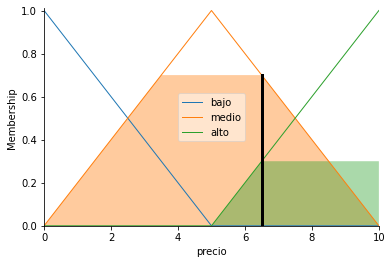

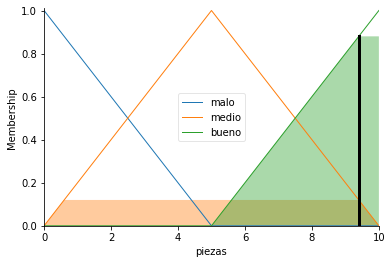

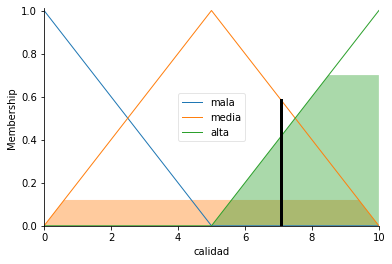

In [8]:
precio.view(sim=calidad_sim)
piezas.view(sim=calidad_sim)
calidad.view(sim=calidad_sim)

In [9]:

print("calidad :",calidad_sim.output['calidad'])


calidad : 7.074381970794527
